In [179]:
# Import Dependencies
import numpy as np
import pandas as pd
import os

import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import os
import csv
from matplotlib import pyplot as plt
import scipy.stats as st

In [180]:
# Best S&P500 ETF to show performance of the S&P500
SPY = pdr.get_data_yahoo('SPY', start='2012-01-01')
# Best NASDAQ ETF to show performance of the NASDAQ
QQQ = pdr.get_data_yahoo('QQQ', start='2012-01-01')
# Best DOW ETF to show performance of the DOW
VTI = pdr.get_data_yahoo('VTI', start='2012-01-01')

# Grabbing a list of all SECTOR ETFS from https://etfdb.com/etfs/sector/ to keep it Standardized.
# Technology, Healthcare, Energy, Real Estate, Materials, Financials, Industrials, Utilities, Consumer Staples, Consumer Discretionary, Communication Services/Telecom.
# Are the main 11 Sectors in the US Economy.

# QQQ is already the Technology NASDAQ best fit.
# Import the XLK (Biggest Technology ETF Fund)
XLK = pdr.get_data_yahoo('XLK', start='2012-01-01')
# XLC (Communication Services/Telecom ETF)
XLC = pdr.get_data_yahoo('XLC', start='2012-01-01')
# XLY (Consumer Cyclical/Consumer Discretionary ETF)
XLY = pdr.get_data_yahoo('XLY', start='2012-01-01')
# XLP (Consumer Defensive/Consumer Staples ETF)
XLP = pdr.get_data_yahoo('XLP', start='2012-01-01')
# XLV (Healthcare ETF)
XLV = pdr.get_data_yahoo('XLV', start='2012-01-01')
# XLI (Industrials ETF)
XLI = pdr.get_data_yahoo('XLI', start='2012-01-01')
# XLF (Financials ETF)
XLF = pdr.get_data_yahoo('XLF', start='2012-01-01')
# VNQ (Real Estate ETF)
VNQ = pdr.get_data_yahoo('VNQ', start='2012-01-01')
# XLE (Energy ETF)
XLE = pdr.get_data_yahoo('XLE', start='2012-01-01')
# XLU (Utilities ETF)
XLU = pdr.get_data_yahoo('XLU', start='2012-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [181]:
# Not all Data is equal length. Might want to look for other ETFs to get longer span of Index.
# QQQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\QQQ.csv', index=False)
# SPY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\SPY.csv', index=False)
# VTI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VTI.csv', index=False)
# XLK.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLK.csv', index=False)
# XLC.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLC.csv', index=False)
# XLY.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLY.csv', index=False)
# XLP.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLP.csv', index=False)
# XLV.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLV.csv', index=False)
# XLI.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLI.csv', index=False)
# XLF.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLF.csv', index=False)
# VNQ.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\VNQ.csv', index=False)
# XLE.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLE.csv', index=False)
# XLU.to_csv(r'F:\CODE\Bootcamp-Project1\DATA\XLU.csv', index=False)

# folder = 'data'
# if not os.path.exists(folder):
#     os.makedirs(folder)

# files = ['QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU']
# file_paths = [f'{folder}/{file}.csv' for file in files]

# for file, file_path in zip(files, file_paths):
#     locals()[file].to_csv(file_path, index=True)

In [182]:
# XLV.head()

In [183]:
# Show that that DataFrame SPY imported OK
SPY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,127.760002,128.380005,127.430000,127.500000,103.596191,193697900
2012-01-04 00:00:00-05:00,127.199997,127.809998,126.709999,127.699997,103.758682,127186500
2012-01-05 00:00:00-05:00,127.010002,128.229996,126.430000,128.039993,104.034943,173895000
2012-01-06 00:00:00-05:00,128.199997,128.220001,127.290001,127.709999,103.766830,148050000
2012-01-09 00:00:00-05:00,128.000000,128.179993,127.410004,128.020004,104.018715,99530200


In [184]:
# SPY.tail()

In [185]:
# Show that that DataFrame QQQ imported OK
# QQQ.head()

In [186]:
# QQQ.tail()

In [187]:
# Show that that DataFrame VTI imported OK
VTI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269066,2230400
2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293556,1647400
2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530449,1146300
2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407909,1640000
2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530449,1978900


In [188]:
# VTI.tail()

In [189]:
#QQQ', 'SPY', 'VTI', 'XLK', 'XLC', 'XLY', 'XLP', 'XLV', 'XLI', 'XLF', 'VNQ', 'XLE', 'XLU'

VTI = VTI.reset_index()
QQQ = QQQ.reset_index()
SPY = SPY.reset_index()
XLK = XLK.reset_index()
XLC = XLC.reset_index()
XLY = XLY.reset_index()
XLP = XLP.reset_index()
XLV = XLV.reset_index()
XLI = XLI.reset_index()
XLF = XLF.reset_index()
VNQ = VNQ.reset_index()
XLE = XLE.reset_index()
XLU = XLU.reset_index()


In [190]:
VTI["Ticker"] = "VTI"
QQQ["Ticker"] = "QQQ"
SPY["Ticker"] = "SPY"
XLK["Ticker"] = "XLK"
XLC["Ticker"] = "XLC"
XLY["Ticker"] = "XLY"
XLP["Ticker"] = "XLP"
XLV["Ticker"] = "XLV"
XLI["Ticker"] = "XLI"
XLF["Ticker"] = "XLF"
VNQ["Ticker"] = "VNQ"
XLE["Ticker"] = "XLE"
XLU["Ticker"] = "XLU"

VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269066,2230400,VTI
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293556,1647400,VTI
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530449,1146300,VTI
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407909,1640000,VTI
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530449,1978900,VTI


In [191]:
VTI["DayChange"] = int("0")
VTI["CumulativeChange"] = int("0")
QQQ["DayChange"] = int("0")
QQQ["CumulativeChange"] = int("0")
SPY["DayChange"] = int("0")
SPY["CumulativeChange"] = int("0")
XLK["DayChange"] = int("0")
XLK["CumulativeChange"] = int("0")
XLC["DayChange"] = int("0")
XLC["CumulativeChange"] = int("0")
XLY["DayChange"] = int("0")
XLY["CumulativeChange"] = int("0")
XLP["DayChange"] = int("0")
XLP["CumulativeChange"] = int("0")
XLV["DayChange"] = int("0")
XLV["CumulativeChange"] = int("0")
XLI["DayChange"] = int("0")
XLI["CumulativeChange"] = int("0")
XLF["DayChange"] = int("0")
XLF["CumulativeChange"] = int("0")
VNQ["DayChange"] = int("0")
VNQ["CumulativeChange"] = int("0")
XLE["DayChange"] = int("0")
XLE["CumulativeChange"] = int("0")
XLU["DayChange"] = int("0")
XLU["CumulativeChange"] = int("0")

In [192]:
#checking DTypes
VTI.dtypes

Date                datetime64[ns, America/New_York]
Open                                         float64
High                                         float64
Low                                          float64
Close                                        float64
Adj Close                                    float64
Volume                                         int64
Ticker                                        object
DayChange                                      int64
CumulativeChange                               int64
dtype: object

In [193]:
count = VTI["Open"].count()
print(count)
count.dtype

2793


dtype('int64')

In [194]:
# Run through all tickers to update percent change field
changing = 0
tickers1 = [QQQ, SPY, VTI, XLK, XLC, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU]
for x in tickers1:
    x["DayChange"] = x.groupby("Ticker").Close.pct_change()*100
    x["CumulativeChange"] = x.groupby("Ticker").DayChange.cumsum()

In [195]:
VTI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
0,2012-01-03 00:00:00-05:00,65.410004,65.720001,65.139999,65.209999,53.269066,2230400,VTI,NaN,NaN
1,2012-01-04 00:00:00-05:00,65.150002,65.349998,64.769997,65.239998,53.293556,1647400,VTI,0.046003,0.046003
2,2012-01-05 00:00:00-05:00,64.940002,65.599998,64.580002,65.529999,53.530449,1146300,VTI,0.444514,0.490517
3,2012-01-06 00:00:00-05:00,65.559998,65.599998,65.099998,65.379997,53.407909,1640000,VTI,-0.228905,0.261612
4,2012-01-09 00:00:00-05:00,65.529999,65.620003,65.190002,65.529999,53.530449,1978900,VTI,0.229430,0.491043


In [196]:
VTI.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
2788,2023-02-01 00:00:00-05:00,203.910004,208.320007,202.509995,206.919998,206.919998,4385600,VTI,1.218024,132.311254
2789,2023-02-02 00:00:00-05:00,209.000000,210.880005,208.100006,210.009995,210.009995,3730800,VTI,1.493329,133.804583
2790,2023-02-03 00:00:00-05:00,207.509995,210.179993,207.039993,207.839996,207.839996,2853500,VTI,-1.033283,132.771300
2791,2023-02-06 00:00:00-05:00,206.410004,207.070007,205.500000,206.279999,206.279999,2840200,VTI,-0.750576,132.020723
2792,2023-02-07 00:00:00-05:00,206.410004,206.029999,205.530701,205.802704,205.802704,142065,VTI,-0.231382,131.789341


In [197]:
QQQ.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
0,2012-01-03 00:00:00-05:00,56.910000,57.189999,56.750000,56.900002,51.284283,39514100,QQQ,NaN,NaN
1,2012-01-04 00:00:00-05:00,56.810001,57.220001,56.560001,57.139999,51.500591,29403400,QQQ,0.421789,0.421789
2,2012-01-05 00:00:00-05:00,57.020000,57.660000,56.799999,57.610001,51.924206,41260600,QQQ,0.822543,1.244332
3,2012-01-06 00:00:00-05:00,57.619999,57.939999,57.400002,57.810001,52.104469,46325200,QQQ,0.347163,1.591495
4,2012-01-09 00:00:00-05:00,57.959999,57.980000,57.430000,57.619999,51.933212,39195500,QQQ,-0.328667,1.262828


In [198]:
#Check to see if the data merged.
data = pd.concat([SPY, QQQ, VTI, XLK, XLC, XLY, XLP, XLV, XLI, XLF, VNQ, XLE, XLU])
data.sample(30)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
1619,2018-06-11 00:00:00-04:00,28.170000,28.270000,28.020000,28.020000,25.375521,47319600,XLF,-0.213673,103.542167
10,2012-01-18 00:00:00-05:00,35.549999,36.009998,35.509998,35.990002,29.062407,15984200,XLI,0.897122,4.284100
415,2013-08-28 00:00:00-04:00,39.439999,39.450001,39.200001,39.230000,30.506538,18628600,XLP,-0.758915,19.863766
1627,2018-06-21 00:00:00-04:00,74.540001,74.580002,73.330002,73.680000,58.351612,15009800,XLE,-1.851604,16.071161
2784,2023-01-26 00:00:00-05:00,73.250000,73.309998,72.830002,73.070000,73.070000,8081500,XLP,-0.354564,92.518275
85,2012-05-04 00:00:00-04:00,138.520004,139.300003,136.919998,137.000000,111.802971,193927300,SPY,-1.615799,7.391895
1710,2018-10-18 00:00:00-04:00,71.860001,72.839996,71.709999,72.169998,57.548759,16586700,XLE,-0.496347,14.447427
515,2014-01-22 00:00:00-05:00,65.139999,65.250000,64.900002,65.199997,58.388630,4636000,XLY,0.261415,52.327692
1210,2016-10-24 00:00:00-04:00,52.290001,52.689999,52.290001,52.570000,44.400673,7609500,XLP,0.650967,51.346206
1858,2019-05-23 00:00:00-04:00,178.940002,179.020004,177.139999,178.250000,173.985596,45351300,QQQ,-1.530220,123.737120


In [199]:
# Test of how to get daily percent change
# data['Change %'] = data.groupby('Ticker').Close.pct_change()

In [200]:
data.sample(30)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,DayChange,CumulativeChange
1955,2019-10-10 00:00:00-04:00,88.500000,89.510002,88.419998,89.199997,84.181892,8232300,XLV,0.495713,101.085899
386,2013-07-18 00:00:00-04:00,44.599998,45.080002,44.540001,44.950001,37.499039,10896300,XLI,1.011238,28.187050
2060,2020-03-12 00:00:00-04:00,59.590000,63.000000,54.099998,58.380001,55.497761,23659800,XLI,-10.350125,63.454390
202,2012-10-19 00:00:00-04:00,37.099998,37.220001,36.650002,36.790001,30.182272,15722900,XLI,-1.683584,7.407543
854,2015-05-28 00:00:00-04:00,75.070000,75.339996,74.769997,75.129997,66.102348,5766400,XLV,0.066590,78.797065
1473,2017-11-08 00:00:00-05:00,153.800003,154.539993,153.619995,154.500000,148.957092,17373500,QQQ,0.402908,106.167917
34,2012-02-22 00:00:00-05:00,136.259995,136.550003,135.789993,136.029999,110.526978,124455300,SPY,-0.322417,6.525258
1139,2016-07-14 00:00:00-04:00,216.399994,216.669998,215.660004,216.119995,192.529770,91230900,SPY,0.558346,56.717105
1250,2016-12-20 00:00:00-05:00,52.169998,52.169998,51.810001,52.049999,44.289371,15316900,XLP,-0.191759,50.483024
1988,2019-11-26 00:00:00-05:00,62.889999,63.090000,62.750000,63.000000,56.827606,16150100,XLU,0.334447,64.955306


In [201]:
#Test that we have the correct amount of Unique tickers added to the DataFrame
Ticker_count = len(data.groupby("Ticker").nunique())
print(Ticker_count)

13


In [202]:
data.value_counts

<bound method DataFrame.value_counts of                           Date        Open        High         Low  \
0    2012-01-03 00:00:00-05:00  127.760002  128.380005  127.430000   
1    2012-01-04 00:00:00-05:00  127.199997  127.809998  126.709999   
2    2012-01-05 00:00:00-05:00  127.010002  128.229996  126.430000   
3    2012-01-06 00:00:00-05:00  128.199997  128.220001  127.290001   
4    2012-01-09 00:00:00-05:00  128.000000  128.179993  127.410004   
...                        ...         ...         ...         ...   
2788 2023-02-01 00:00:00-05:00   68.760002   69.699997   68.269997   
2789 2023-02-02 00:00:00-05:00   69.250000   70.129997   68.709999   
2790 2023-02-03 00:00:00-05:00   68.739998   69.010002   67.000000   
2791 2023-02-06 00:00:00-05:00   67.660004   68.550003   67.540001   
2792 2023-02-07 00:00:00-05:00   67.660004   68.232803   67.790001   

           Close   Adj Close     Volume Ticker  DayChange  CumulativeChange  
0     127.500000  103.596191  193697900  

In [203]:
#Describe the Data to see what pops out if anything.
data.describe()

,Open,High,Low,Close,Adj Close,Volume,DayChange,CumulativeChange
count,34677.000000,34677.000000,34677.000000,34677.000000,34677.000000,3.467700e+04,34664.000000,34664.000000
mean,96.321952,96.942202,95.645270,96.332498,88.393281,2.329479e+07,0.045204,66.906460
std,76.105334,76.602839,75.546461,76.110853,75.196823,3.292481e+07,1.263247,48.412640
min,10.706742,10.844842,10.658002,10.804224,8.771100,1.660000e+04,-20.141180,-86.914252
25%,51.169998,51.490002,50.869999,51.220001,44.228115,5.399200e+06,-0.488866,30.566474
50%,73.040001,73.510002,72.489998,73.029999,63.289288,1.032740e+07,0.076825,58.152802
75%,108.779999,109.339996,108.160004,108.800003,102.530098,2.523120e+07,0.642030,95.491643
max,479.220001,479.980011,476.059998,477.709991,470.083679,5.072443e+08,16.037339,214.274135


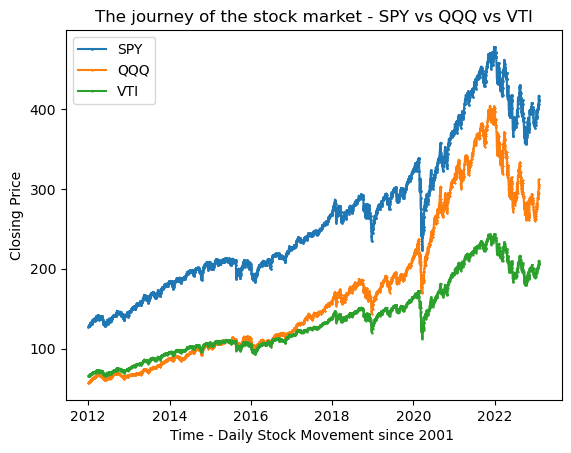

In [210]:
#Plot out the initial info we have to see what we are working with.
SPY_line = data.loc[data["Ticker"] == "SPY"]
QQQ_line = data.loc[data["Ticker"] == "QQQ"]
VTI_line = data.loc[data["Ticker"] == "VTI"]
plt.plot(SPY_line["Date"], SPY_line["Close"], marker = 'o', markersize=1)
plt.plot(QQQ_line["Date"], QQQ_line["Close"], marker = 'x', markersize=1)
plt.plot(VTI_line["Date"], VTI_line["Close"], marker = 'v', markersize=1)
plt.xlabel("Time - Daily Stock Movement since 2001 ")
plt.ylabel("Closing Price")
plt.title(f"The journey of the stock market - SPY vs QQQ vs VTI")
plt.legend(["SPY", "QQQ", "VTI"], loc="best")
plt.show()

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34677 entries, 0 to 2792
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                           
---  ------            --------------  -----                           
 0   Date              34677 non-null  datetime64[ns, America/New_York]
 1   Open              34677 non-null  float64                         
 2   High              34677 non-null  float64                         
 3   Low               34677 non-null  float64                         
 4   Close             34677 non-null  float64                         
 5   Adj Close         34677 non-null  float64                         
 6   Volume            34677 non-null  int64                           
 7   Ticker            34677 non-null  object                          
 8   DayChange         34664 non-null  float64                         
 9   CumulativeChange  34664 non-null  float64                         
dtypes: datetime64[ns, Ameri

In [206]:
#Seems like we have all of the data points matching one another meaning that our initial 3 ETFs representing the Stock Market, DOW, NASDAQ and S&P500 are most likely in line with one another.
data.count()

Date                34677
Open                34677
High                34677
Low                 34677
Close               34677
Adj Close           34677
Volume              34677
Ticker              34677
DayChange           34664
CumulativeChange    34664
dtype: int64

In [207]:
count = data.groupby("Ticker")
count1 = count["Volume"].sum()
count1

Ticker
QQQ    111171779800
SPY    281102060300
VNQ     12465360773
VTI      8599938265
XLC      5073942848
XLE     54210553800
XLF    162889195337
XLI     32627851900
XLK     28716906893
XLP     31039739000
XLU     38121005270
XLV     25934918500
XLY     15840079800
Name: Volume, dtype: int64

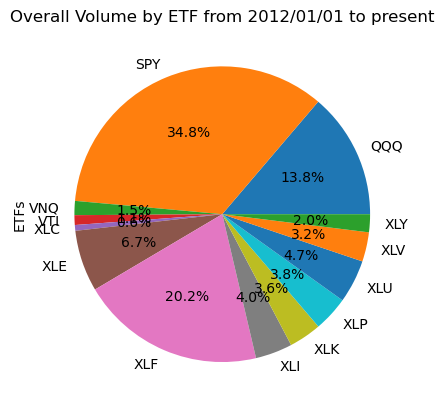

In [208]:
label = count1.index.values
plt.pie(count1, labels=label, autopct="%1.1f%%", startangle=0, shadow=False)
plt.title("Overall Volume by ETF from 2012/01/01 to present")
plt.ylabel("ETFs")
plt.show()